In [ ]:
!wget --no-check-certificate \
    https://github.com/NESLegends/TetrisBinaryCNN/blob/main/Pictures/Train.zip?raw=true \
    -O /tmp/train.zip

In [ ]:
!wget --no-check-certificate \
    https://github.com/NESLegends/TetrisBinaryCNN/blob/main/Pictures/Validation.zip?raw=true \
    -O /tmp/valid.zip

In [4]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
train_ready_dir = os.path.join('/tmp/Train/TetrisReady')

train_notready_dir = os.path.join('/tmp/Train/NOTTetrisReady')

valid_ready_dir = os.path.join('/tmp/Validation/TetrisReady')

valid_notready_dir = os.path.join('/tmp/Validation/NOTTetrisReady')

In [14]:
train_ready_names = os.listdir(train_ready_dir)
print(train_ready_names[:10])

train_notready_names = os.listdir(train_notready_dir)
print(train_notready_names[:10])

validation_ready_names = os.listdir(valid_ready_dir)
print(validation_ready_names[:10])

validation_notready_names = os.listdir(valid_notready_dir)
print(validation_notready_names[:10])

['Screen Shot 2021-02-02 at 1.48.06 PM.png', 'Screen Shot 2021-02-02 at 1.47.24 PM.png', 'Screen Shot 2021-02-02 at 2.04.12 PM.png', 'Screen Shot 2021-02-02 at 1.47.32 PM.png', 'Screen Shot 2021-02-02 at 1.50.05 PM.png', 'Screen Shot 2021-02-02 at 1.47.42 PM.png', 'Screen Shot 2021-02-02 at 1.48.45 PM.png', 'Screen Shot 2021-02-02 at 1.48.21 PM.png', 'Screen Shot 2021-02-02 at 1.46.51 PM.png', 'Screen Shot 2021-02-02 at 1.47.02 PM.png']
['Screen Shot 2021-02-02 at 1.56.28 PM.png', 'Screen Shot 2021-02-02 at 1.55.05 PM.png', 'Screen Shot 2021-02-02 at 1.55.21 PM.png', 'Screen Shot 2021-02-02 at 1.55.16 PM.png', 'Screen Shot 2021-02-02 at 1.54.04 PM.png', 'Screen Shot 2021-02-02 at 1.54.20 PM.png', 'Screen Shot 2021-02-02 at 1.54.35 PM.png', 'Screen Shot 2021-02-02 at 1.55.00 PM.png', 'Screen Shot 2021-02-02 at 1.55.37 PM.png', 'Screen Shot 2021-02-02 at 1.54.53 PM.png']
['Screen Shot 2021-02-02 at 1.50.57 PM.png', 'Screen Shot 2021-02-02 at 1.51.12 PM.png', 'Screen Shot 2021-02-02 at 1.

In [15]:
print('total training ready images:', len(os.listdir(train_ready_dir)))
print('total training notready images:', len(os.listdir(train_notready_dir)))
print('total validation ready images:', len(os.listdir(valid_ready_dir)))
print('total validation notready images:', len(os.listdir(valid_notready_dir)))

total training ready images: 16
total training notready images: 16
total validation ready images: 6
total validation notready images: 6


In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

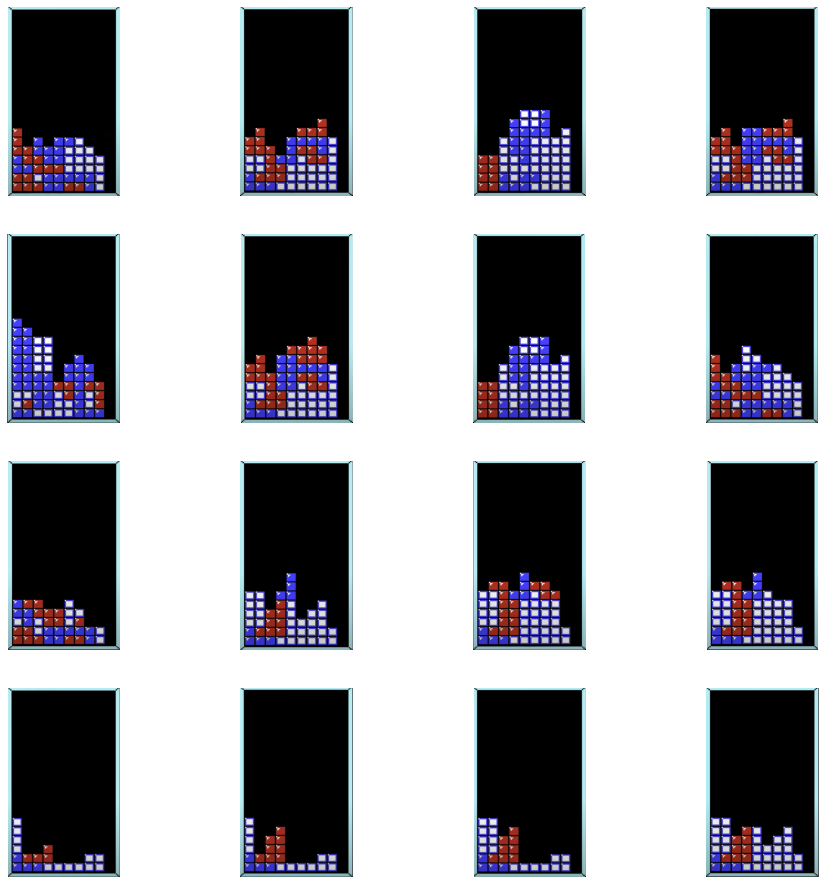

In [26]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ready_pic = [os.path.join(train_ready_dir, fname) 
                for fname in train_ready_names[pic_index-8:pic_index]]
next_notready_pic = [os.path.join(train_notready_dir, fname) 
                for fname in train_notready_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ready_pic + next_notready_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/Train/',  
        classes = ['TetrisReady', 'NOTTetrisReady'],
        target_size=(200, 200),  
        batch_size=4,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/Validation/',  
        classes = ['TetrisReady', 'NOTTetrisReady'],
        target_size=(200, 200),  
        batch_size=1,
        class_mode='binary',
        shuffle=False)

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [41]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [42]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15360128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 2s 148ms/step - loss: 5.9521 - accuracy: 0.4887 - val_loss: 5.1745 - val_accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 1s 105ms/step - loss: 1.1134 - accuracy: 0.8944 - val_loss: 1.7753 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 1s 104ms/step - loss: 0.4175 - accuracy: 0.8840 - val_loss: 1.0929 - val_accuracy: 0.3750
Epoch 4/15
8/8 [==============================] - 1s 103ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.9283 - val_accuracy: 0.3750
Epoch 5/15
8/8 [==============================] - 1s 108ms/step - loss: 7.9597e-06 - accuracy: 1.0000 - val_loss: 0.9481 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 1s 103ms/step - loss: 6.5993e-06 - accuracy: 1.0000 - val_loss: 1.1664 - val_accuracy: 0.7500
Epoch 7/15
8/8 [==============================] - 1s 129ms/step - loss: 9.5410e-06 - accuracy: 1.0000 - val_loss: 1.2880 - val_accuracy: 0.7500
Epoch 8/

Saving Screen Shot 2021-02-02 at 2.37.10 PM.png to Screen Shot 2021-02-02 at 2.37.10 PM (2).png
[0.]
Screen Shot 2021-02-02 at 2.37.10 PM.png is not tetris ready


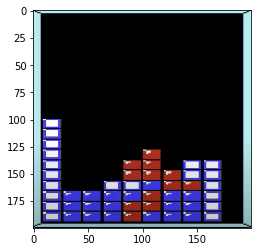

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is not tetris ready")
  else:
    print(fn + " is tetris ready")